<a href="https://colab.research.google.com/github/eeolga/article/blob/main/Data_analysis_and_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data analysis and visualization

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7475 entries, 0 to 7474
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          7475 non-null   object 
 1   userid             7475 non-null   int64  
 2   toolid             7475 non-null   int64  
 3   activityid         7475 non-null   int64  
 4   competency_weight  7475 non-null   float64
 5   tool_weight        7475 non-null   float64
 6   activity_weight    7475 non-null   float64
 7   log_weight         7475 non-null   float64
 8   performance        7475 non-null   float64
 9   attainment         7475 non-null   int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 584.1+ KB
None

First few rows of the data:
           timestamp  userid  toolid  activityid  competency_weight  \
0  1/02/24, 10:46:00   18630  233150       10503             0.0133   
1  1/03/24, 09:50:22   21041  233162       20807             0.040

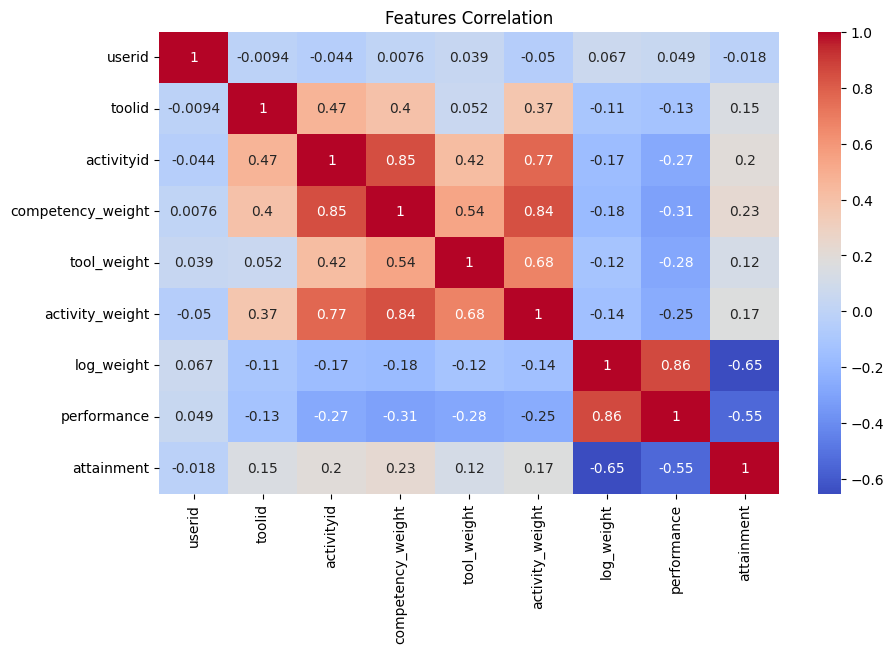

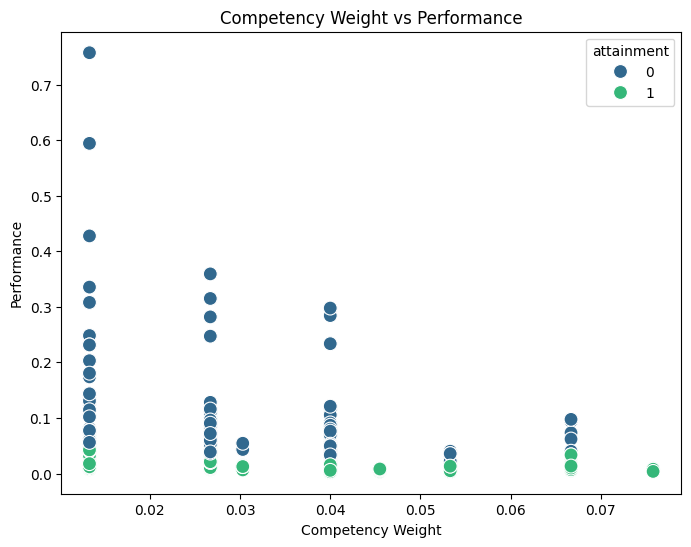

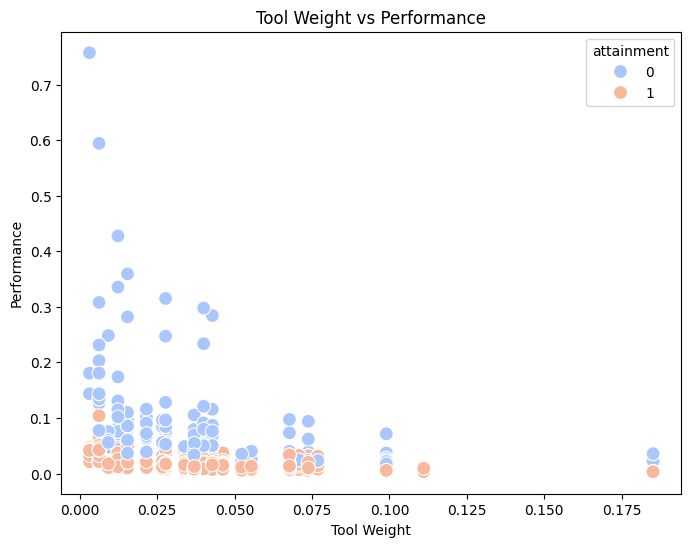

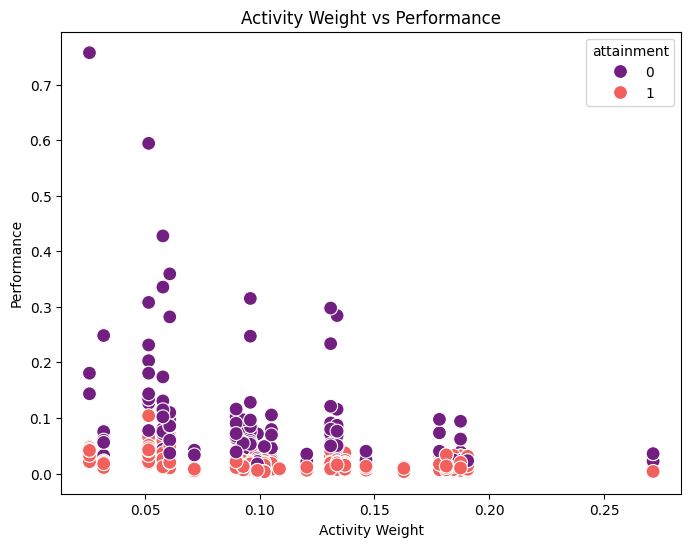

<ipython-input-1-14210f443153>:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned, x='attainment', y='performance', palette='Set2')


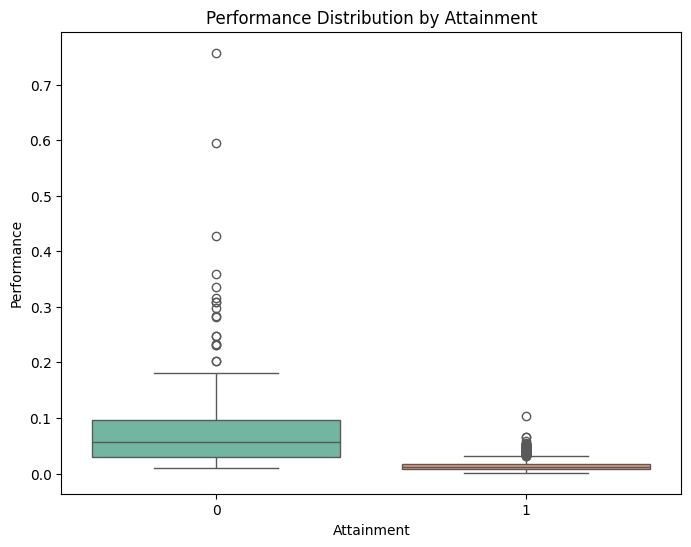

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Excel data
file_path = '/content/updated_merged_data_19102024.xlsx'
data = pd.read_excel(file_path)

# Step 2: Basic Data Inspection
print("Data Info:")
print(data.info())

print("\nFirst few rows of the data:")
print(data.head())

# Check for duplicate entries based on userid, toolid, and activityid
duplicates = data.duplicated(subset=['userid', 'toolid', 'activityid'], keep=False)
print(f"\nNumber of duplicate rows: {duplicates.sum()}")

# Step 3: Drop duplicates (if necessary)
data_cleaned = data.drop_duplicates(subset=['userid', 'toolid', 'activityid'])

# Step 4: Summary statistics
print("\nSummary statistics:")
print(data_cleaned.describe())

# Step 5: Visualizations

# Visualization 1: Correlation Map
# Exclude non-numeric columns from correlation calculation
numeric_data = data_cleaned.select_dtypes(include=['number']) # Select only numeric columns for correlation

def divide_df(all_data):
    # Returns divided dfs of training and test set
    return all_data.loc[:16], all_data.loc[16:].drop(['timestamp'], axis=1)

df_train = pd.read_excel("/content/updated_merged_data_19102024.xlsx")
df_test = pd.read_excel("/content/updated_merged_data_19102024.xlsx")


df_train.name = 'Training Set'
df_test.name = 'Test Set'


dfs = [df_train, df_test]

print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}\n'.format(df_test.shape[0]))
print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}\n'.format(df_train['attainment'].shape[0]))
print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}\n'.format(df_test.shape[0]))
print(df_train.columns)
print(df_test.columns)

# Ensure 'timestamp' column is dropped from both training and test datasets
df_train_cleaned = df_train.drop(['timestamp', 'userid', 'toolid', 'activityid'], axis=1)
df_test_cleaned = df_test.drop([ 'timestamp', 'userid', 'toolid', 'activityid'], axis=1)

# Verify all columns in df_train_cleaned and df_test_cleaned are numeric
numeric_columns_train = df_train_cleaned.select_dtypes(include=[int, float]).columns
numeric_columns_test = df_test_cleaned.select_dtypes(include=[int, float]).columns

# Compute correlations only on numeric columns
df_train_corr = df_train_cleaned[numeric_columns_train].corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_train_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_train_corr.drop(df_train_corr.iloc[1::2].index, inplace=True)
df_train_corr_nd = df_train_corr.drop(df_train_corr[df_train_corr['Correlation Coefficient'] == 1.0].index)

df_test_corr = df_test_cleaned[numeric_columns_test].corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_test_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_test_corr.drop(df_test_corr.iloc[1::2].index, inplace=True)
df_test_corr_nd = df_test_corr.drop(df_test_corr[df_test_corr['Correlation Coefficient'] == 1.0].index)

corr = df_train_corr_nd['Correlation Coefficient'] > 0.1 # Training set correlations
df_train_corr_nd[corr]

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm') # Use numeric_data for heatmap
plt.title('Features Correlation')
plt.show()

# Visualization 2: Competency Weight vs Performance
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_cleaned, x='competency_weight', y='performance', hue='attainment', palette='viridis', s=100)
plt.title('Competency Weight vs Performance')
plt.xlabel('Competency Weight')
plt.ylabel('Performance')
plt.show()

# Visualization 3: Tool Weight vs Performance
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_cleaned, x='tool_weight', y='performance', hue='attainment', palette='coolwarm', s=100)
plt.title('Tool Weight vs Performance')
plt.xlabel('Tool Weight')
plt.ylabel('Performance')
plt.show()

# Visualization 4: Activity Weight vs Performance
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_cleaned, x='activity_weight', y='performance', hue='attainment', palette='magma', s=100)
plt.title('Activity Weight vs Performance')
plt.xlabel('Activity Weight')
plt.ylabel('Performance')
plt.show()

# Visualization 5: Performance Distribution by Attainment Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_cleaned, x='attainment', y='performance', palette='Set2')
plt.title('Performance Distribution by Attainment')
plt.xlabel('Attainment')
plt.ylabel('Performance')
plt.show()

# Optional: Save cleaned data to a new Excel file
output_file = 'cleaned_data.xlsx'  # Changed to save in the current directory
# or
# output_dir = '/path/to/'  # Replace with a valid directory path
# os.makedirs(output_dir, exist_ok=True) #Create the directory if doesn't exist.
# output_file = os.path.join(output_dir, 'cleaned_data.xlsx') # Combine directory and file name

data_cleaned.to_excel(output_file, index=False)
